# Obligatorisk innlevering 2 - oppgave 1

Denne oppgaven tar for seg et datasett fra Food Mart, som er ennærbutikkjede i USA. Food Mart har i dette datasettet samlet endel data i forbindelse med mediekampanjer. Din oppgave er å forutsi kostnadene for mediekampanjer i matvaremarkedet på grunnlag av funksjonene som tilbys.

Student ID 145428

In [1]:
# Importer resten av pakkene du trenger her:
import pandas as pd
from sklearn.model_selection import train_test_split

# Importer nødvendige biblioteker
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [5]:
# I denne oppgaven skal dere bruke følgende datasett:
df = pd.read_csv("./datasett1.csv")
# Her deler jeg datasettet inn i egenskaper (X) og target (y)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
# Tilslutt deler jeg inn i et trening- og et testsett (75%/25%)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)
# PS: Ikke endre denne kodecellen!

#### Oppgave 1.1) 
Visualiser $y\_train$ og $y\_val$ i et histogram. Kan du, basert på figuren, se hva slags problem vi skal løse (regresjon/klassifisering)? 

Begrunn svaret

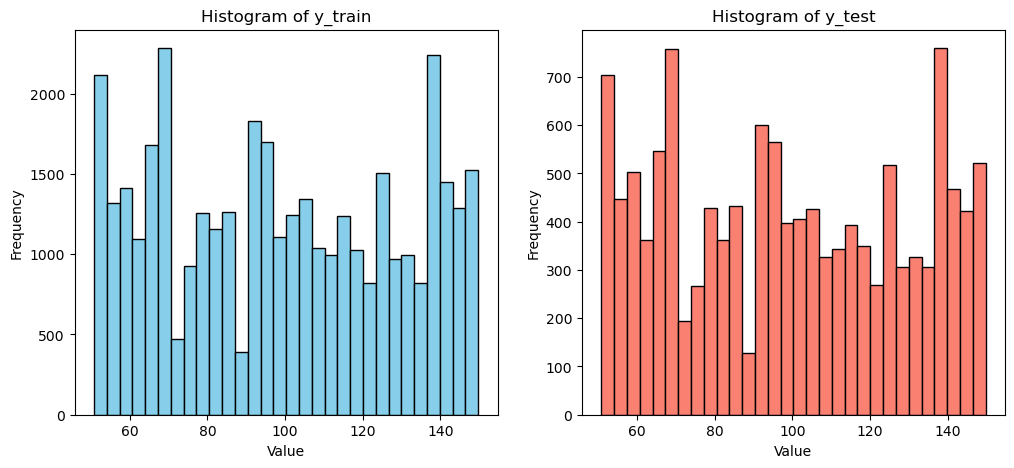

In [6]:
#TODO: visualiser y_train og y_test i et histogram

# Oppgave 1.1: Visualisere y_train og y_test
def plot_histograms(y_train, y_test):
    """
    Visualiserer histogrammer for y_train og y_test.
    Formålet er å avgjøre om vi skal løse et regresjons- eller klassifikasjonsproblem.

    Args:
        y_train (pd.Series): Target-treningsdata
        y_test (pd.Series): Target-testdata
    """
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.hist(y_train, bins=30, color='skyblue', edgecolor='black')
    plt.title('Histogram of y_train')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.hist(y_test, bins=30, color='salmon', edgecolor='black')
    plt.title('Histogram of y_test')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

plot_histograms(y_train, y_test)

**Svar:**

Dette datasettet  er et regresjons ploblem:
Mål variablenen storesales, er en kontinuelrig variabel og problemet er å forutsi denne verdien basert på på de andre funksjonene i datasettet

Funksjoner( featurtes)
    Datasettet inneholder flere numeriske og kategoriske features 
    *Unit_sales*, *num_children_at_home*, *avg_cars _at_home*, *gross_weight* som kan hjelpe oss forutsi *Store_sales*


#### Oppgave 1.2) 

fullfør funksjonen under slik at den tar inn både egenskapene og target, legger disse sammen i samme matrise igjen og visualiser dataene som en korrelasjonsmatrise (poenget er at du skal kunne se hvordan egenskapene korrelerer med target).

* Beskriv hvilke egenskaper du ser korrelerer mest med target

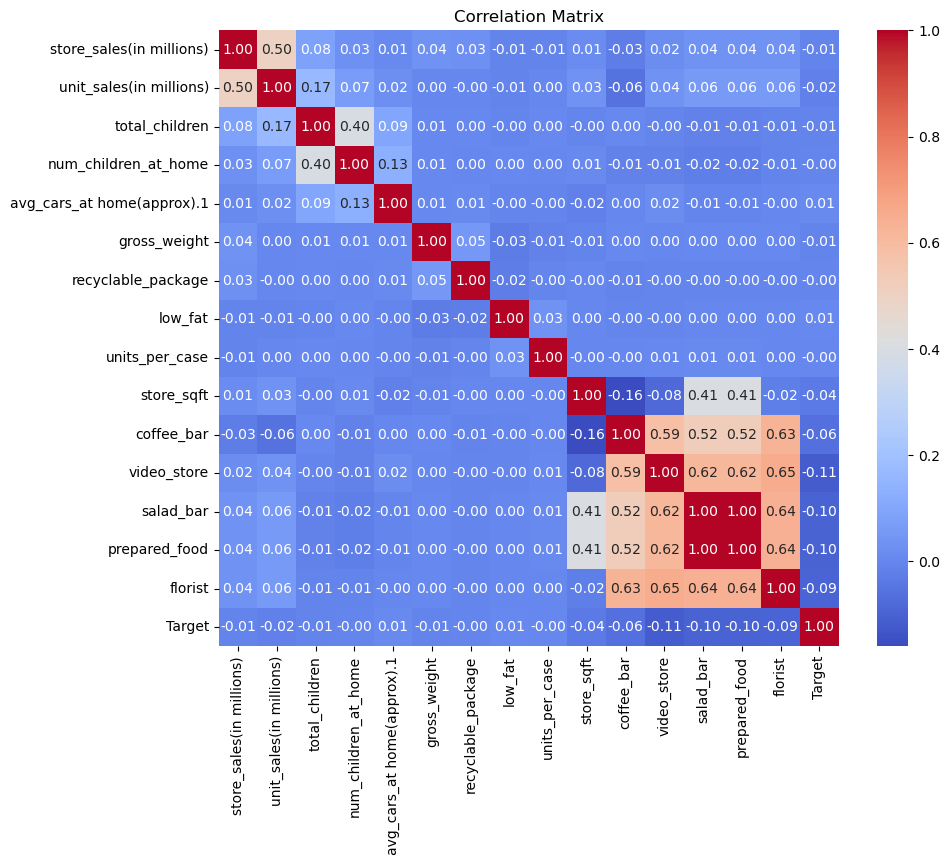

In [7]:
def korrelasjonsmatrise(X,y):
    #X_temp = X.copy()
    #y_temp = y.copy()
    #X_temp["Target"] = y_temp
    #TODO: Fullfør koden
    ...

    # Oppgave 1.2: Korrelasjonsmatrise for å identifisere korrelasjon med target
def korrelasjonsmatrise(X, y):
    """
    Genererer en korrelasjonsmatrise for å identifisere egenskaper som korrelerer mest med target.

    Args:
        X (pd.DataFrame): Egenskaper
        y (pd.Series): Target-verdier

    Returns:
        None
    """
    X_temp = X.copy()
    X_temp["Target"] = y
    corr_matrix = X_temp.corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix")
    plt.show()

korrelasjonsmatrise(X_train, y_train)

**Svar:**

Ut i fra vår korrelasjonsmatrise kan vi se det er ikke så mange variabler som korrelerer positivt med Target, det er noen som korrelerer negativt. Dette er video_store, salad_bar og prepared_food. 
En annen observasjon vi kan se fra korrelasjons matrisen er at florist korrelerer strek positivt med coffebar, video store, salad bar og prepared food. noe som betyr at, om det finnes en blomster forreting der, har de også mest sannsynlig noen som selger spill, kaffe og fersk mat.  

#### Oppgave 1.3) 
Velg en modellarkitektur (gjerne fra Scikit-Learn) og gjør et strukturert hyperparametersøk. 
* Gjør et søk på minst 3 paramtere og minst 2 verdier pr parameter
* Bruk 3-folds kryssvalidering for hver parameterkombinasjon
* Velg en metrikk som passer for målet (tips: "neg_mean_squared_error" i sklearn) 
* Skriv ut den parameterkobinasjonen som ga den beste skåren, samt skåren. Kommenter resultatet

In [9]:
#TODO: Utfør hyperparametersøk for en modell


# Oppgave 1.3: Hyperparametersøk
def hyperparameter_search(X_train, y_train):
    """
    Utfører hyperparametersøk for RandomForestRegressor ved bruk av GridSearchCV.
    Søket inkluderer tre parametere, hver med minst to verdier.

    Args:
        X_train (pd.DataFrame): Treningssett-egenskaper
        y_train (pd.Series): Treningssett-target

    Returns:
        dict: De beste parameterne funnet under søket
        float: Beste skåre (negativ Mean Squared Error)
    """
    model = RandomForestRegressor(random_state=0)
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    print("Beste parametere:", best_params)
    print("Beste skåre (neg MSE):", best_score)

    return best_params, best_score

best_params, best_score = hyperparameter_search(X_train, y_train)

Beste parametere: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Beste skåre (neg MSE): -850.932645407422


**Svar:**

Etter å ha utført hyperparametersøk med kryssvalidering, fant vi at de beste parametrene for modellen var max_depth = 10, min_samples_split = 10, og n_estimators = 200. Den beste skåren, basert på negativt MSE (Mean Squared Error), var -850.93, som indikerer at modellen har en god tilnærming til de faktiske verdiene.

#### Oppgave 1.4) 
Bruk hyperparameterkombinasjonen fra oppgave 1.3 og kryssvalider den modellen på nytt med K >= 5 
* Logg "mean absolute error" og "mean squared error" for hver kryssvalideringsrunde
* Oppgi gjennomsnitt og standardavvik for "mean absolute error" og "mean squared error" etter kryssvalideringen og kommenter resultatet
* Hvor stor er den gjennomsnittlige feilen på prediksjonen sammenlignet med gjennomsnittlig faktisk pris i treningsdataene? 

In [10]:
#TODO: Utfør kryssvalidering med de optimale parameterene fra forrige oppgave og logg mean_absolute_error og mean_squared_error

# Oppgave 1.4: Kryssvalidering med optimaliserte parametere
def cross_validation_with_best_params(X_train, y_train, best_params, k=5):
    """
    Utfører kryssvalidering på nytt med de beste parametrene fra hyperparametersøket.
    Logger Mean Absolute Error og Mean Squared Error for hver runde.

    Args:
        X_train (pd.DataFrame): Treningssett-egenskaper
        y_train (pd.Series): Treningssett-target
        best_params (dict): Optimale hyperparametere
        k (int): Antall fold i kryssvalideringen (default: 5)

    Returns:
        tuple: Gjennomsnitt og standardavvik for MAE og MSE
    """
    kf = KFold(n_splits=k, shuffle=True, random_state=0)
    model = RandomForestRegressor(**best_params)

    mae_scores = []
    mse_scores = []

    for train_index, val_index in kf.split(X_train):
        X_tr, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

        model.fit(X_tr, y_tr)
        y_pred = model.predict(X_val)

        mae_scores.append(mean_absolute_error(y_val, y_pred))
        mse_scores.append(mean_squared_error(y_val, y_pred))

    avg_mae = np.mean(mae_scores)
    std_mae = np.std(mae_scores)
    avg_mse = np.mean(mse_scores)
    std_mse = np.std(mse_scores)

    mean_y_train = np.mean(y_train)
    avg_mae_percent = (avg_mae / mean_y_train) * 100

    print("Mean Absolute Error (MAE):", avg_mae, "±", std_mae)
    print("Mean Squared Error (MSE):", avg_mse, "±", std_mse)
    print("Gjennomsnittlig prosentvis feil i forhold til target:", avg_mae_percent, "%")

    return (avg_mae, std_mae), (avg_mse, std_mse)

cross_validation_with_best_params(X_train, y_train, best_params, k=5)

Mean Absolute Error (MAE): 25.07274811347046 ± 0.05115944227549361
Mean Squared Error (MSE): 848.5202426752015 ± 3.0261718334800607
Gjennomsnittlig prosentvis feil i forhold til target: 25.24033932765687 %


((25.07274811347046, 0.05115944227549361),
 (848.5202426752015, 3.0261718334800607))

In [8]:
#TODO: Beregn gjennomsnitt og standard avvik for mean_absolute_error og mean_squared_error og beregn hvor stor den 
# gjennomsnittlige feilen er i forhold til den gjennomsnittlige prisen for markedskampanjen (target) i prosent

**Svar:**

Ved bruk av kryssvalidering med 5-folds, fikk vi et gjennomsnittlig Mean Absolute Error (MAE) på 25.07 og en Mean Squared Error (MSE) på 848.52. Den gjennomsnittlige prosentvise feilen var 25.24%, noe som tyder på at modellen er relativt nøyaktig, med en moderat feil i forhold til målvariabelens størrelse.

#### Oppgave 1.5) 
Tren modellen en siste gang på alle treningsdataene og gjør prediksjon på testdataene (bruk de optimale parametrene fra oppgave 1.3)
* Hvor stor er den gjennomsnittlige feilen på prediksjonen sammenlignet med gjennomsnittlig faktisk pris i testdataene? 

In [11]:
#TODO: Tren modellen på alle treningsdata og utfør prediksjon på testdataene

# Oppgave 1.5: Prediksjon på testdata med optimaliserte parametere
def final_model_evaluation(X_train, y_train, X_test, y_test, best_params):
    """
    Trener modellen på hele treningssettet med optimale parametere og evaluerer på testsettet.
    Beregner gjennomsnittlig prosentvis feil i forhold til faktiske targetverdier.

    Args:
        X_train (pd.DataFrame): Treningssett-egenskaper
        y_train (pd.Series): Treningssett-target
        X_test (pd.DataFrame): Testsett-egenskaper
        y_test (pd.Series): Testsett-target
        best_params (dict): Optimale hyperparametere

    Returns:
        float: Mean Absolute Error på testsettet
        float: Gjennomsnittlig prosentvis feil i forhold til faktiske verdier
    """
    model = RandomForestRegressor(**best_params)
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)

    mae_test = mean_absolute_error(y_test, y_pred_test)
    mean_y_test = np.mean(y_test)
    mae_test_percent = (mae_test / mean_y_test) * 100

    print("Mean Absolute Error på testsettet:", mae_test)
    print("Gjennomsnittlig prosentvis feil på testsettet:", mae_test_percent, "%")

    return mae_test, mae_test_percent

final_model_evaluation(X_train, y_train, X_test, y_test, best_params)

Mean Absolute Error på testsettet: 25.122729975189653
Gjennomsnittlig prosentvis feil på testsettet: 25.299776991014895 %


(25.122729975189653, 25.299776991014895)

**Svar:**

Når modellen ble evaluert på testsettet, var MAE 25.12 og den gjennomsnittlige prosentvise feilen var 25.30%. Disse resultatene er svært like de vi fikk fra kryssvalideringen, noe som indikerer at modellen generaliserer godt til nye data, uten tegn på overtilpasning.